In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        # plt.imshow(img[:,:,::-1]);
        plt.imshow(img);
    plt.show()

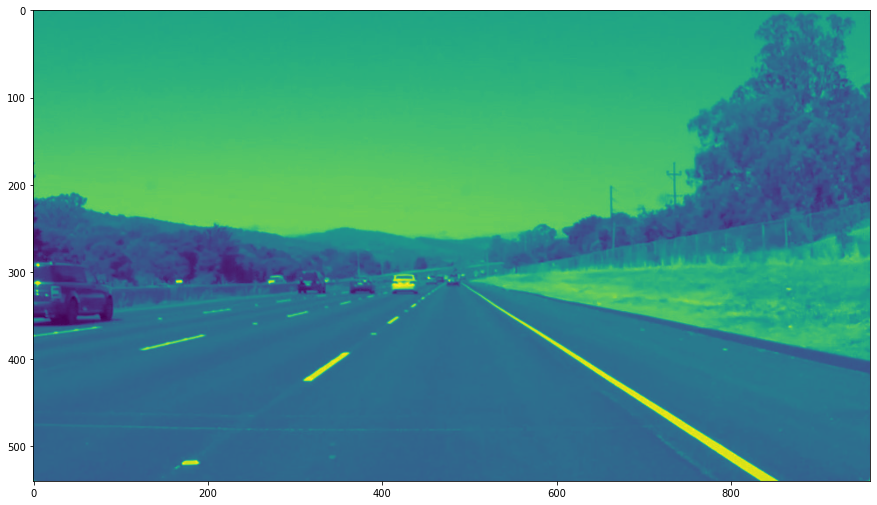

In [20]:
#img = cv2.imread("Test/test_images/solidWhiteCurve.jpg")

img = cv2.imread("Test/test_images/solidWhiteRight.jpg")

img = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imshow(gray_img)


In [21]:
gray_img.size

518400

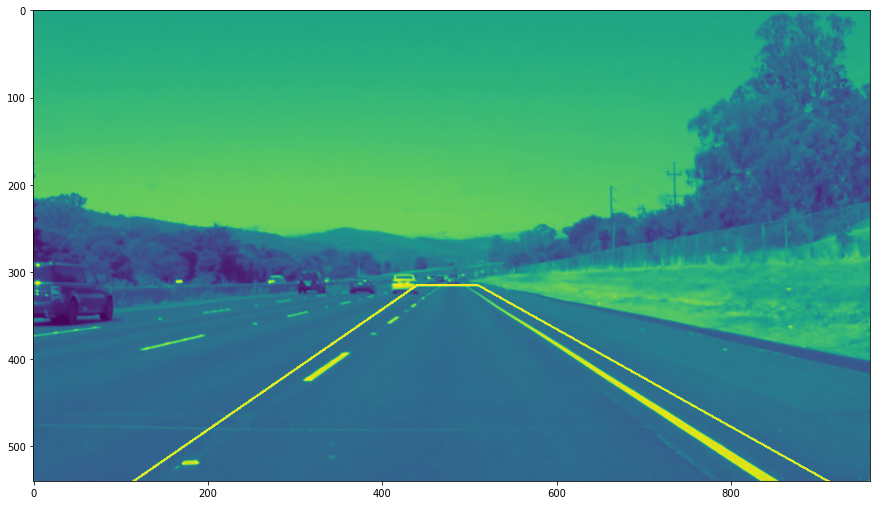

In [22]:
pts = np.array([[
    [100, 550],
    [930, 550],
    [510, 315],
    [440, 315],
]],np.int32)



  
pts = pts.reshape((-1, 1, 2))
  
isClosed = True
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.polylines() method
# Draw a Blue polygon with 
# thickness of 1 px
cropped = cv2.polylines(gray_img, [pts], 
                      isClosed, color, thickness)

imshow(cropped)

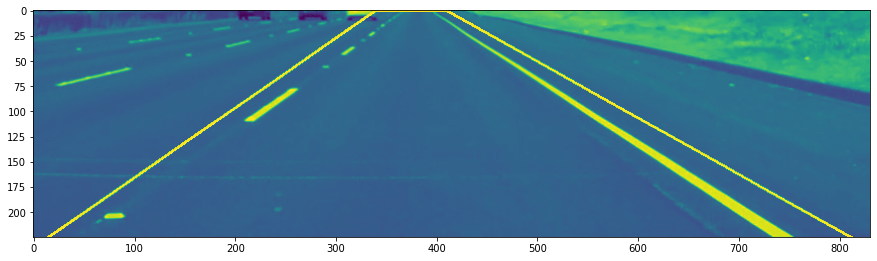

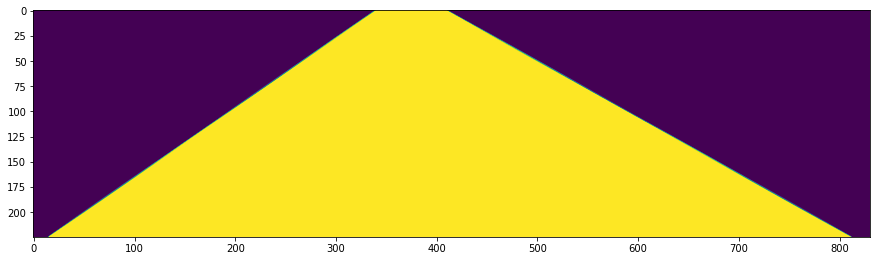

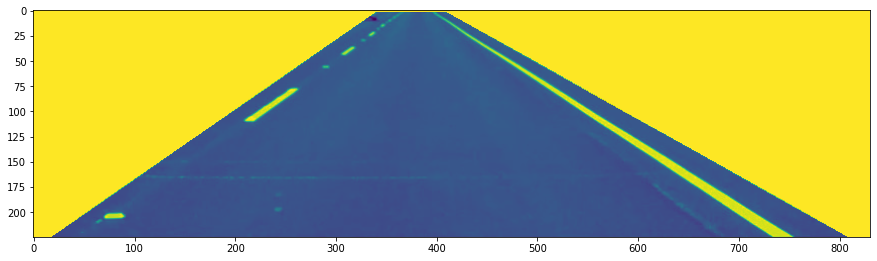

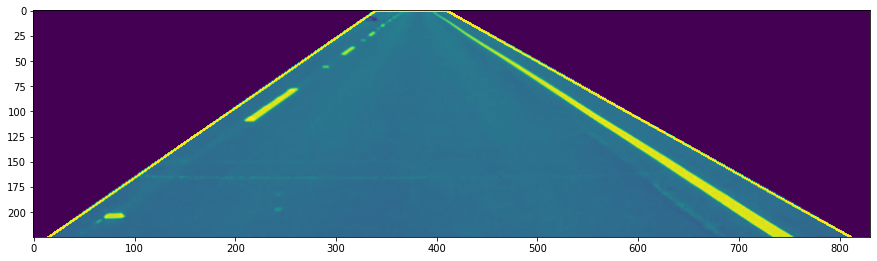

In [23]:
rect = cv2.boundingRect(pts)
x,y,w,h = rect
cropped = cropped[y:y+h, x:x+w].copy()
#imshow(cropped)




# (2) make mask
pts = pts - pts.min(axis=0)

mask = np.zeros(cropped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

## (3) do bit-op
dst = cv2.bitwise_and(cropped, cropped, mask=mask)

## (4) add the white background
bg = np.ones_like(cropped, np.uint8)*255
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst


imshow(cropped)
imshow(mask)
imshow(dst2)
imshow(dst)



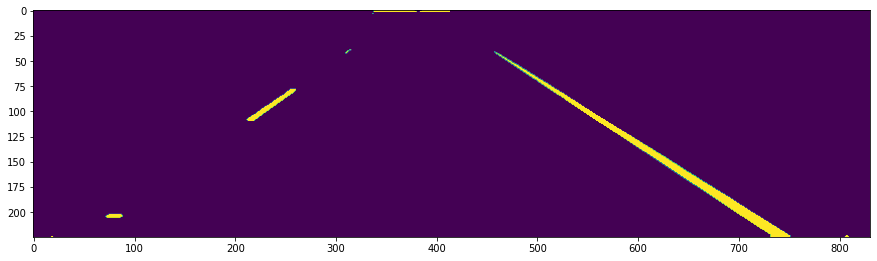

In [24]:
#blur = cv2.medianBlur(dst,21)
#blur = cv2.GaussianBlur(dst,(5,5),1)

blur = cv2.blur(dst,(5,5),1)

_,thresh = cv2.threshold(blur,190,255,cv2.THRESH_BINARY)


imshow(thresh)

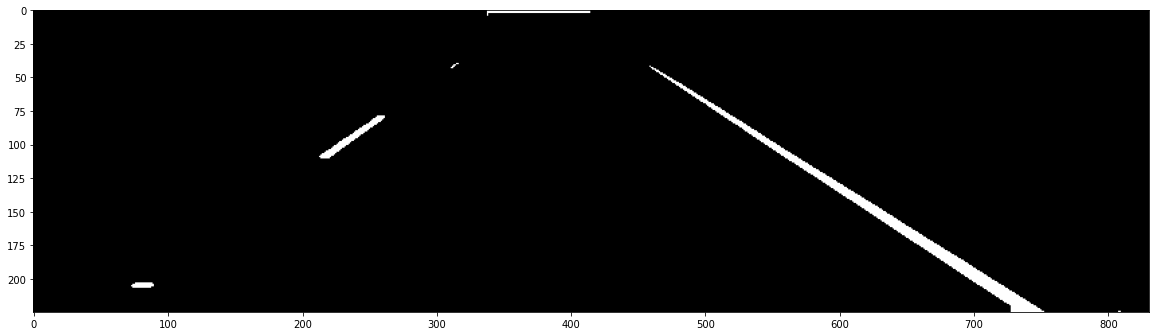

In [25]:


kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)
plt.figure(figsize=(20,15))
plt.imshow(opening ,cmap='gray')

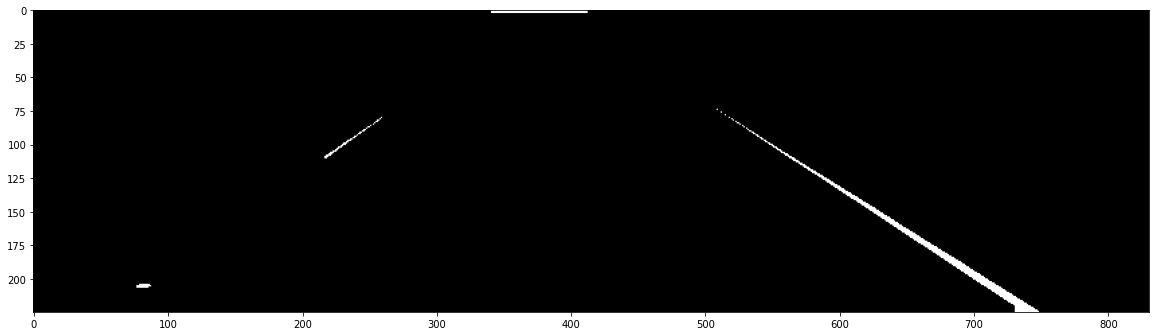

In [26]:
kernel = np.ones([2,6])

erosion = cv2.erode(opening,kernel)
plt.figure(figsize=(20,15))
plt.imshow(erosion ,cmap='gray')

In [27]:
#edges = cv2.Canny(erosion, 1, 255, apertureSize=3)

#cv2.imshow("Image Name", edges)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)

In [28]:
#lines = cv2.HoughLines(thresh, 1, np.pi / 180, 15)

lines = cv2.HoughLines(erosion, 1, np.pi / 180, 50)
#lines
#lines = cv2.HoughLines(opening, 1, np.pi / 180, 60)

type(lines)


numpy.ndarray

In [29]:
image = img.copy()

for line in lines:
    for r, theta in line:
        
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a * r

        # y0 stores the value rsin(theta)
        y0 = b * r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000 * (-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000 * (a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000 * (-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000 * (a))

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.

        

        print(a)
        cv2.putText(image, str(a), (500,500), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 10, cv2.LINE_AA)
        if abs(a)>0.51 and 0.52>abs(a) or a>0.1:
            cv2.line(image[y:y+h, x:x+w], (x1, y1), (x2, y2), (0, 0, 255), 2)
        elif abs(a)<0.1:
            pass
        else : 
            pass

-0.54463905
-0.5299194
-0.55919284
-0.5150381
-0.5735765
-0.50000006
-0.58778524
-0.48480958
-0.6018151
0.03489949
0.017452383
-4.371139e-08
-0.01745235
-0.034899462
-0.46947157
-0.6156615
-0.45399037
-0.6293203
0.052335974
-0.052335944
-0.43837112
-0.64278764
0.58778524
-0.43837112
-0.45399037


In [30]:
cv2.imshow("Image Name", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1